# **Notebook: Introdução à Computação no Mercado Financeiro**

**Trabalho 1: Fronteira Eficiente de Markowitz**

SSC0964 - Prof. Denis Fernando Wolf

Instituto de Ciências Matemáticas e de Computação (ICMC-USP)

Amanda Araujo Silva

# Descrição do trabalho

O Trabalho 1 consiste em refazer a prática de Fronteira eficiente de Markowitz com 2 e 3 ativos diferentes daqueles utilizados na aula (GUAR3 e JBSS3) e (GUAR3, JBSS3 e PSSA3). O próprio Notebook da aula pode ser usado como base para o trabalho. 

Devem ser exibidos: 

  a) o gráfico da Fronteira eficiente 

  b) o gráfico de Drawdown

  c) as rentabilidades anualizadas dos ativos que compõe o portfólio e do próprio portfólio 

  d) as volatilidades anualizadas dos ativos que compõe o portfólio e do próprio portfólio

A entrega deve ser feita pelo e-disciplinas, e pode ser o link compartilhado do Notebook do Colab.

# Instalação de pacotes e bibliotecas

In [2]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 133.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.17
    Uninstalling yfinance-0.2.17:
      Successfully uninstalled yfinance-0.2.17


In [3]:
# Bibliotecas úteis:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style = 'whitegrid')

# Escolha das ações

A seguir, confira as 5 principais ações da bolsa de valores brasileira, que juntas atualmente representam 43,48% do peso dentro da B3:
* VALE3. Empresa Vale do Rio Doce; está no ranking das três maiores mineradoras do mundo.
* ITUB4. Ação do banco Itaú; O Itaú Unibanco é o maior banco privado do país, uma das maiores companhias financeiras do Brasil e está entre os maiores grupos empresariais do país.
* BBDC4. Banco Bradesco; a companhia é atualmente um dos maiores bancos no Brasil em termos de total de ativos. 
* ABEV3. Ação da Companhia de Bebidas das Américas, a AmBev recentemente adquiriu a “Sab Miller” e se tornou a maior cervejaria de todo o mundo, sendo responsável por 1 a cada 3 cervejas consumidas.
* PETR4. O PETR4 é um código de um tipo de ações da Petrobras. Empresa estatal do ramo do petróleo, têm atividades no Brasil e em mais 17 países. 

*Ref.* https://blog.nelogica.com.br/quais-as-principais-acoes-do-mercado/

As empresas que estão com as ações em alta são Cielo (CIEL3), Prio (PRIO3), BBSeguridade (BBSE3), Hypera (HYPE3), Assaí (ASAI3), Petrobras (PETR3 e PTER4), Sabesp (SBSP3), Copel, (CPLE6) e Eletrobras (ELET3). Nas Small Caps, o top 3 é composto por Dommo, Mills e Cury.

*Ref.* https://blog.toroinvestimentos.com.br/bolsa/acoes-em-alta (Atualizado: 03/04/2023)

# Obtenção dos dados

In [4]:
acoes = ['VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PETR4.SA', 'CIEL3.SA', 'PRIO3.SA', 'BBSE3.SA', 'HYPE3.SA', 'ASAI3.SA', 'ELET3.SA']

ydata = yf.download(acoes, '2015-01-01', '2022-12-31', '1d') #8 anos
dados = ydata["Adj Close"]

[*********************100%***********************]  11 of 11 completed


In [5]:
display(dados)

,ABEV3.SA,ASAI3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Date,,,,,,,,,,,
2015-01-02,11.537621,NaN,9.015285,16.213974,15.747147,4.501232,12.669842,12.862836,4.124555,0.440000,13.109157
2015-01-05,11.328761,NaN,9.033876,15.727820,15.211935,4.413752,12.693316,12.927474,3.772028,0.407000,12.912025
2015-01-06,11.760882,NaN,9.331064,16.395609,14.906661,4.453515,12.403767,13.136594,3.648643,0.367000,13.429489
2015-01-07,11.926529,NaN,9.701888,16.133839,15.045420,4.612569,13.147208,13.611870,3.820501,0.366000,13.922316
2015-01-08,12.645179,NaN,9.751853,16.085756,15.461694,4.525089,13.115907,13.824792,4.067269,0.378000,14.070165
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,19.981815,14.472077,31.864504,5.091296,43.189999,44.490429,24.834997,25.120001,35.490002,84.465065
2022-12-26,14.520000,19.891987,14.127959,31.541969,5.130000,42.860001,43.765957,24.342043,24.940001,35.439999,85.238083
2022-12-27,14.520000,19.263187,14.061048,31.494537,5.080000,41.730000,43.974369,24.204016,25.110001,35.580002,87.273392


In [6]:
dados = dados.drop(['ASAI3.SA'], axis = 1) #Retirada de ASAI3: ação não apresenta dados para todo o período de tempo desejado
display(dados)

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Date,,,,,,,,,,
2015-01-02,11.537621,9.015285,16.213974,15.747147,4.501232,12.669842,12.862836,4.124555,0.440000,13.109157
2015-01-05,11.328761,9.033876,15.727820,15.211935,4.413752,12.693316,12.927474,3.772028,0.407000,12.912025
2015-01-06,11.760882,9.331064,16.395609,14.906661,4.453515,12.403767,13.136594,3.648643,0.367000,13.429489
2015-01-07,11.926529,9.701888,16.133839,15.045420,4.612569,13.147208,13.611870,3.820501,0.366000,13.922316
2015-01-08,12.645179,9.751853,16.085756,15.461694,4.525089,13.115907,13.824792,4.067269,0.378000,14.070165
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.472077,31.864504,5.091296,43.189999,44.490429,24.834997,25.120001,35.490002,84.465065
2022-12-26,14.520000,14.127959,31.541969,5.130000,42.860001,43.765957,24.342043,24.940001,35.439999,85.238083
2022-12-27,14.520000,14.061048,31.494537,5.080000,41.730000,43.974369,24.204016,25.110001,35.580002,87.273392


In [7]:
# Transformando preço da ação para mesma base (base 100)
dados = dados*100/dados.iloc[0] 
display(dados)

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA
Date,,,,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,98.189745,100.206216,97.001638,96.601216,98.056530,100.185280,100.502519,91.452988,92.500002,98.496233
2015-01-06,101.935069,103.502704,101.120237,94.662617,98.939910,97.899933,102.128286,88.461509,83.409094,102.443578
2015-01-07,103.370776,107.615983,99.505764,95.543784,102.473483,103.767738,105.823241,92.628203,83.181818,106.202985
2015-01-08,109.599529,108.170207,99.209215,98.187273,100.530024,103.520683,107.478569,98.611104,85.909089,107.330815
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.715891,160.528220,196.524947,32.331548,959.515124,351.152207,193.075597,609.035473,8065.909516,644.321122
2022-12-26,125.849166,156.711169,194.535709,32.577331,952.183841,345.434124,189.243205,604.671358,8054.545186,650.217901
2022-12-27,125.849166,155.968966,194.243172,32.259812,927.079577,347.079071,188.170136,608.793017,8086.364096,665.743757


# Dinâmica dos preço dos ativos

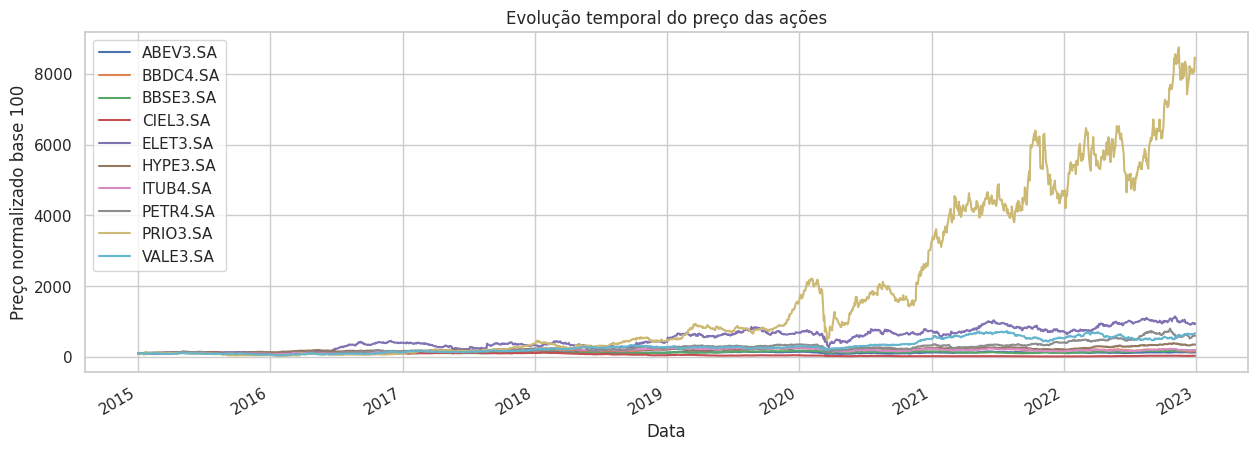

In [10]:
dados.plot(figsize = (15, 5))
plt.xlabel("Data")
plt.ylabel("Preço normalizado base 100")
plt.title("Evolução temporal do preço das ações")
plt.show()

> Observa-se que no período, a ação PRIO3 cresceu bastante, praticamente eclipsando a dinâmica dos outros ativos no gráfico.

In [ ]:
list(dados.columns)

In [ ]:
dados['ABEV3.SA']

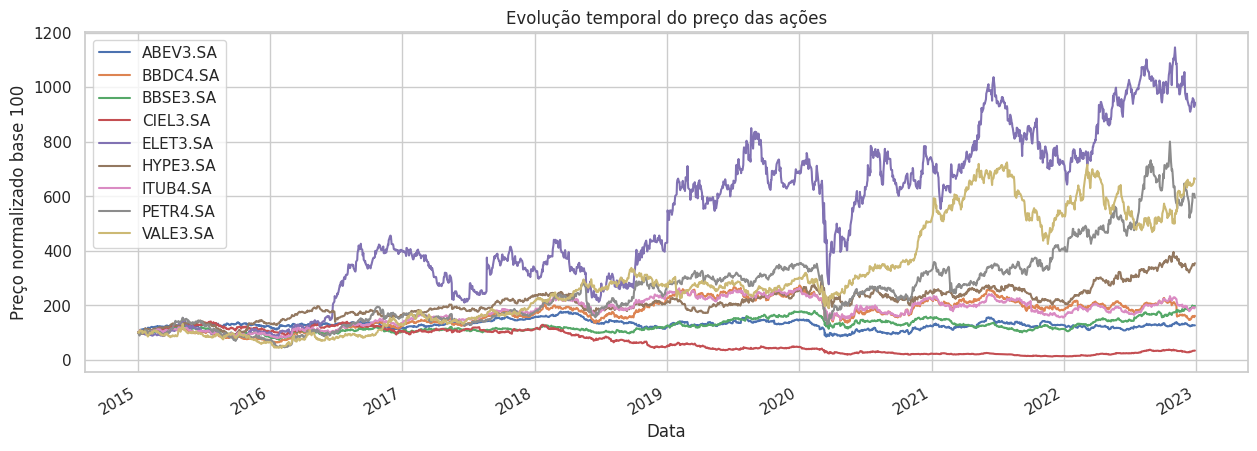

In [18]:
# Sem o ativo PRIO3:
for i in list(dados.columns):
  if i != 'PRIO3.SA':
    dados[i].plot(figsize = (15, 5))
    plt.legend()
plt.xlabel("Data")
plt.ylabel("Preço normalizado base 100")
plt.title("Evolução temporal do preço das ações")
plt.show()

> Plotando sem o ativo PRIO3, conseguimos visualizar a dinâmica de preços das outras ações, no qual podemos ver que ELET3, VALE3, PETR4 e HYPE3 cresceram bastante no período dos últimos 8 anos, mais do que quituplicando seu preço. Por outro lado, a ação CIEL3 apresentou uma queda, enquanto a ABEV3, BBDC4, BBSE3 e ITUB4 mostraram crescimento mais tímido.

# Construção de um portifólio

Vamos montar dois portifólios, um escolhendo 2 ações dentre o grupo de ações inicial e um segundo portifólio com 3 ações. 

Para ajudar a fazer essa escolha, vamos olhar para os números de cada ação:
* Retorno
* Volatilidade

E, essencial para a construção de uma boa carteira, vamos olhar para a correlação entre as ações.  

## Retorno 

In [19]:
# Retorno acumulado no período (8 anos)
ret_acc = ( dados.iloc[-1]/dados.iloc[0] ) - 1
print("Retorno acumulado:\n", ret_acc)

Retorno acumulado:
 ABEV3.SA     0.258492
BBDC4.SA     0.606342
BBSE3.SA     0.972270
CIEL3.SA    -0.667241
ELET3.SA     8.357439
HYPE3.SA     2.540504
ITUB4.SA     0.916192
PETR4.SA     4.940037
PRIO3.SA    83.568180
VALE3.SA     5.634297
dtype: float64


> O que observamos no gráfico da evolução dos preços se confirma nos números. PRIO3 cresceu bastante, e quando olhamos seu preço, vemos que no começo do período ele é muito mais baixo do que o das outras ações e ao final de 8 anos ele chega ao mesmo patamar das outras (0,44 para 37). 

A PRIO é uma empresa brasileira de capital aberto com foco na produção de petróleo e gás, no investimento e na recuperação de ativos em produção, especializada na gestão eficiente de reservatórios e no desenvolvimento de campos maduros. Fundação: 2009.

> Enquanto isso, a CIEL3 caiu no mesmo período de 2015 para cá (- 66%), embora se olharmos para a tendência atual (no último ano 2022), temos uma indicação de crescimento. 

In [20]:
# Retorno anualizado
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/8)) - 1 #8 anos 
print("Retorno anualizado:\n", ret_aa)

Retorno anualizado:
 ABEV3.SA    0.029156
BBDC4.SA    0.061035
BBSE3.SA    0.088606
CIEL3.SA   -0.128502
ELET3.SA    0.322497
HYPE3.SA    0.171206
ITUB4.SA    0.084688
PETR4.SA    0.249464
PRIO3.SA    0.741409
VALE3.SA    0.266848
dtype: float64


> Em termos de retorno, PRIO3, ELET3, VALE3, PETR4 apresentam os melhores valores em termos anualizados. Enquanto isso, a CIEL3 teria sofrido quedas, desvalorização de 12% ao ano. 

## Volatilidade anualizada

Para o cálculo da volatilidade precisamos de dados das variações diárias de preço de cada ativo.

In [11]:
# DataFrame: variação diária %
dados_chg = dados.pct_change() 
dados_chg = dados_chg.fillna(0)

In [23]:
# Volatilidade
vol_aa = dados_chg.std()*np.sqrt(252)
print("Volatilidade anualizada:\n", vol_aa)

Volatilidade anualizada:
 ABEV3.SA    0.275773
BBDC4.SA    0.368165
BBSE3.SA    0.310408
CIEL3.SA    0.461131
ELET3.SA    0.563496
HYPE3.SA    0.330510
ITUB4.SA    0.329376
PETR4.SA    0.507949
PRIO3.SA    0.771966
VALE3.SA    0.470953
dtype: float64


> Temos que as ações PRIO3, ELET3, PETR4, VALE3 e CIEL3 apresentam as maiores volatilidades. Dentre esse grupo, o ativo ABEV3 foi o que se mostrou menos volátil. 

> Menores volatilidades (em ordem crescente): ABEV3, BBSE3, ITUB4, HYPE3 (< 35%). 

## Correlação entre ações

In [24]:
# Correlação entre as variações dos preço das ações
dados_chg.corr()

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA
ABEV3.SA,1.000000,0.463171,0.375209,0.361367,0.310363,0.360068,0.473868,0.357412,0.215968,0.220841
BBDC4.SA,0.463171,1.000000,0.551765,0.396267,0.480442,0.409052,0.863580,0.597598,0.283381,0.370896
BBSE3.SA,0.375209,0.551765,1.000000,0.375799,0.397167,0.397389,0.576610,0.435888,0.196105,0.255260
CIEL3.SA,0.361367,0.396267,0.375799,1.000000,0.295191,0.342037,0.390060,0.321121,0.207575,0.194729
ELET3.SA,0.310363,0.480442,0.397167,0.295191,1.000000,0.320418,0.468323,0.440271,0.206680,0.250196
HYPE3.SA,0.360068,0.409052,0.397389,0.342037,0.320418,1.000000,0.416462,0.342988,0.210488,0.179023
ITUB4.SA,0.473868,0.863580,0.576610,0.390060,0.468323,0.416462,1.000000,0.573507,0.264221,0.345999
PETR4.SA,0.357412,0.597598,0.435888,0.321121,0.440271,0.342988,0.573507,1.000000,0.410630,0.462318
PRIO3.SA,0.215968,0.283381,0.196105,0.207575,0.206680,0.210488,0.264221,0.410630,1.000000,0.313783
VALE3.SA,0.220841,0.370896,0.255260,0.194729,0.250196,0.179023,0.345999,0.462318,0.313783,1.000000


>  Observamos a maior correlação (0.863580) entre ITUB4 e BBDC4, Banco Itau e Bradesco, respectivamente. Isso é esperado, visto que se tratam empresas que atuam no mesmo setor, o setor bancário.

> Outras correlações altas correspondem a:
*  0.59: PETR4 - BBDC4
*  0.57: ITUB4 - BBSE3
*  0.57: PETR4 - ITUB4

> Buscando correlações baixas: 
*   0.179023: VALE3 - HYPE3
*   0.194729: VALE3 - CIEL3
*   0.196105: PRIO3 - BBSE3

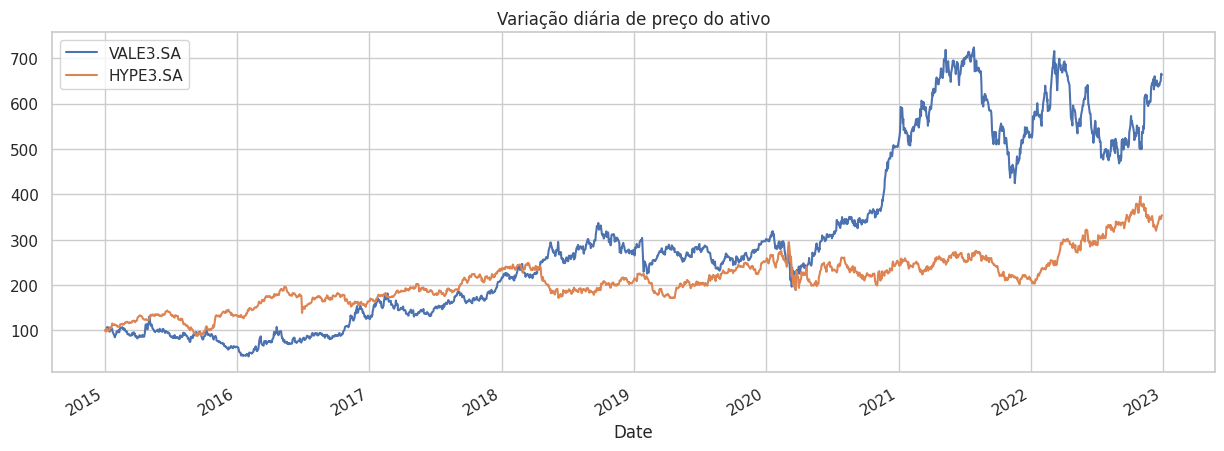

In [26]:
# Correlação VALE3 - HYPE3 (mais baixa)
dados[['VALE3.SA', 'HYPE3.SA']].plot(figsize = (15, 5))
plt.title("Variação diária de preço do ativo")
plt.show()

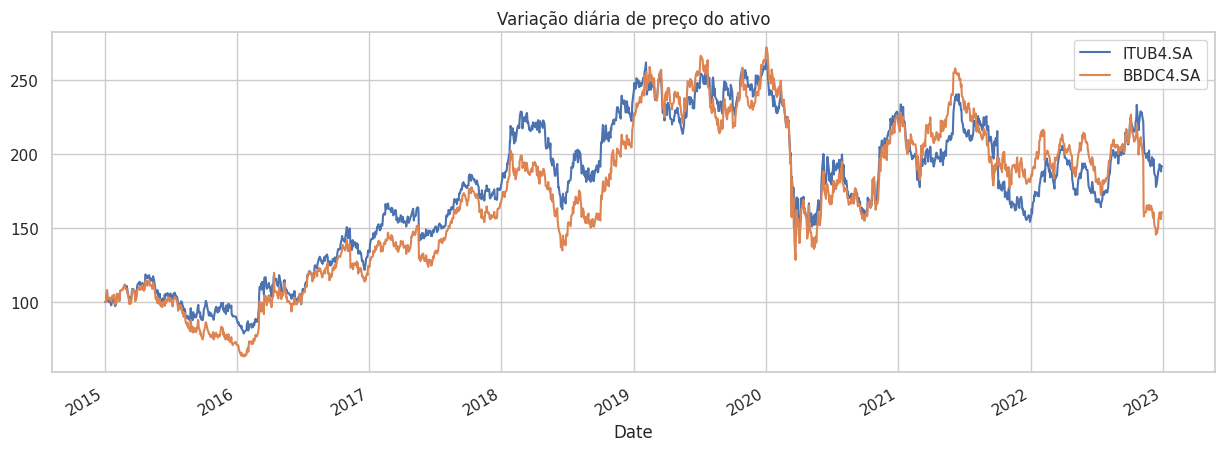

In [27]:
# Correlação ITUB4 - BBDC4 (mais alta: 0.863580)
dados[['ITUB4.SA', 'BBDC4.SA']].plot(figsize = (15, 5))
plt.title("Variação diária de preço do ativo")
plt.show()

# Portifólio 1: VALE3 & HYPE3

Uma combinação que parece interessante é a dos ativos HYPE3 e VALE3. Ambos mostraram uma valorização de preço no período, e embora VALE3 esteja na metade superior de volatilidade desse grupo, HYPE3 se encontra na inferior, e essa é a combinação que apresenta menor correlação da variação diária de preço. Vamos investigar um portifólio formado pela combinação linear das duas ações.

HYPE3: A Hypera Pharma é uma empresa farmacêutica brasileira com sede em São Paulo, sendo considerada a maior empresa farmacêutica brasileira em termos de receita líquida e capitalização de mercado.

Temos uma carteira formada pela combinação de uma empresa mineradora e uma empresa do setor farmacêutico. 

## Proporção do portifólio

Vamos analisar qual a melhor combinação entre as duas ações de modo a minimizar a volatilidade da carteira.

In [31]:
# Rentabilidade & volatilidade do portifólio
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg = port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/8)) - 1 #retorno anualizado (8 anos)
  vol = port_chg.std()*np.sqrt(252)               #volatilidade anualizada
  return ret, vol

In [30]:
list(dados.columns)

['ABEV3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'CIEL3.SA',
 'ELET3.SA',
 'HYPE3.SA',
 'ITUB4.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'VALE3.SA']

In [32]:
len(list(dados.columns))

10

In [34]:
list(dados.columns).index('VALE3.SA')

9

In [35]:
list(dados.columns).index('HYPE3.SA')

5

In [39]:
# Portifólio com 2 ativos: HYPE3 e VALE3 (proporção)
points = []
min_vol_ret = [100, 0] #[vol, ret]
min_port_pesos = np.zeros(len(list(dados.columns)))
port_pesos = np.zeros(len(list(dados.columns)))

for w in range(0, 101, 5):
  port_pesos[list(dados.columns).index('VALE3.SA')] = w/100
  port_pesos[list(dados.columns).index('HYPE3.SA')] = 1 - w/100
  ret, vol = calc_ret_vol(dados, dados_chg, port_pesos)

  print(f"Alocação: {round(w/100, 2):.2f} {round((1 - w/100), 2):.2f} Retorno: {round(ret, 3):.3f} Volatilidade: {round(vol, 3):.3f}")

  points.append([ret, vol]) #salvando dados

  # Estamos interessados no portifólio de menor volatilidade
  if (vol < min_vol_ret[0]):
    min_vol_ret[0] = vol
    min_vol_ret[1] = ret
    min_port_pesos[list(dados.columns).index('VALE3.SA')] = w/100
    min_port_pesos[list(dados.columns).index('HYPE3.SA')] = 1 - w/100

Alocação: 0.00 1.00 Retorno: 0.171 Volatilidade: 0.331
Alocação: 0.05 0.95 Retorno: 0.177 Volatilidade: 0.316
Alocação: 0.10 0.90 Retorno: 0.184 Volatilidade: 0.304
Alocação: 0.15 0.85 Retorno: 0.189 Volatilidade: 0.296
Alocação: 0.20 0.80 Retorno: 0.195 Volatilidade: 0.290
Alocação: 0.25 0.75 Retorno: 0.200 Volatilidade: 0.287
Alocação: 0.30 0.70 Retorno: 0.206 Volatilidade: 0.287
Alocação: 0.35 0.65 Retorno: 0.211 Volatilidade: 0.288
Alocação: 0.40 0.60 Retorno: 0.216 Volatilidade: 0.292
Alocação: 0.45 0.55 Retorno: 0.221 Volatilidade: 0.298
Alocação: 0.50 0.50 Retorno: 0.225 Volatilidade: 0.305
Alocação: 0.55 0.45 Retorno: 0.230 Volatilidade: 0.315
Alocação: 0.60 0.40 Retorno: 0.235 Volatilidade: 0.326
Alocação: 0.65 0.35 Retorno: 0.239 Volatilidade: 0.338
Alocação: 0.70 0.30 Retorno: 0.243 Volatilidade: 0.352
Alocação: 0.75 0.25 Retorno: 0.247 Volatilidade: 0.367
Alocação: 0.80 0.20 Retorno: 0.251 Volatilidade: 0.384
Alocação: 0.85 0.15 Retorno: 0.255 Volatilidade: 0.403
Alocação: 

In [40]:
# Portifólio de menor volatilidade anualizada
print(min_vol_ret) #[vol, ret]
print(min_port_pesos)

[0.2866968855623931, 0.20579074013121024]
[0.  0.  0.  0.  0.  0.7 0.  0.  0.  0.3]


> Portifólio de volatilidade mínima: 30% VALE3 - 70% HYPE3

In [43]:
# Criando portifólio de menor volatilidade
dados['PORT1'] = dados.dot(min_port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [44]:
display(dados)

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA,PORT1
Date,,,,,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,98.189761,100.206268,97.001650,96.601203,98.056541,100.185280,100.502511,91.453003,92.500002,98.496219,99.678562
2015-01-06,101.935069,103.502672,101.120260,94.662604,98.939910,97.899948,102.128218,88.461558,83.409094,102.443585,99.263039
2015-01-07,103.370777,107.615940,99.505752,95.543801,102.473493,103.767761,105.823230,92.628207,83.181818,106.202984,104.498328
2015-01-08,109.599539,108.170206,99.209227,98.187321,100.530045,103.520698,107.478490,98.611127,85.909089,107.330800,104.663729
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.715912,160.528214,196.524947,32.331553,959.515124,351.152233,193.075497,609.035614,8065.909516,644.321029,439.102872
2022-12-26,125.849187,156.711152,194.535709,32.577337,952.183841,345.434150,189.243108,604.671498,8054.545186,650.217806,436.869247
2022-12-27,125.849187,155.968949,194.243172,32.259818,927.079577,347.079097,188.170024,608.793158,8086.364096,665.743660,442.678466


## Gráfico: Fronteira eficiente de Markowitz

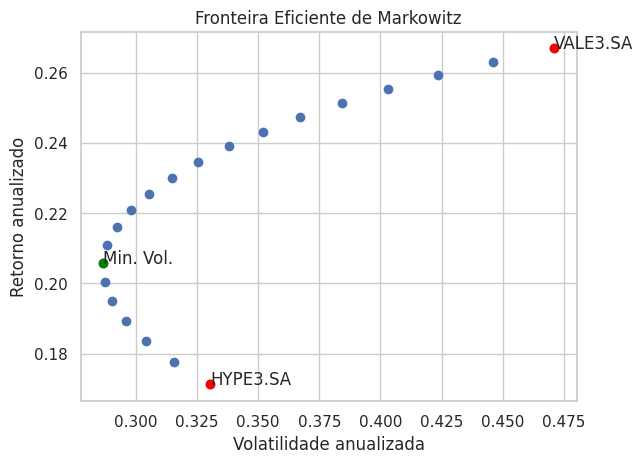

In [42]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno anualizado");
plt.xlabel("Volatilidade anualizada");
plt.title("Fronteira Eficiente de Markowitz")

plt.scatter(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], color='red');
plt.text(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], 'VALE3.SA');

plt.scatter(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], color='red');
plt.text(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], 'HYPE3.SA');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

## Gráfico: Drawdown

In [45]:
# Drawdown do portifólio 1 
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]): #calcula todas as diferenças
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1) * 100)
  ddown[ativo] = list

ddown['Data'] = dados.index.values #vetor com histórico de drawdown
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

ABEV3.SA   -51.989773
BBDC4.SA   -52.742827
BBSE3.SA   -44.043642
CIEL3.SA   -91.679327
ELET3.SA   -67.444388
HYPE3.SA   -38.841215
ITUB4.SA   -45.214021
PETR4.SA   -70.893975
PRIO3.SA   -78.790985
VALE3.SA   -67.580270
PORT1      -34.145891
dtype: float64


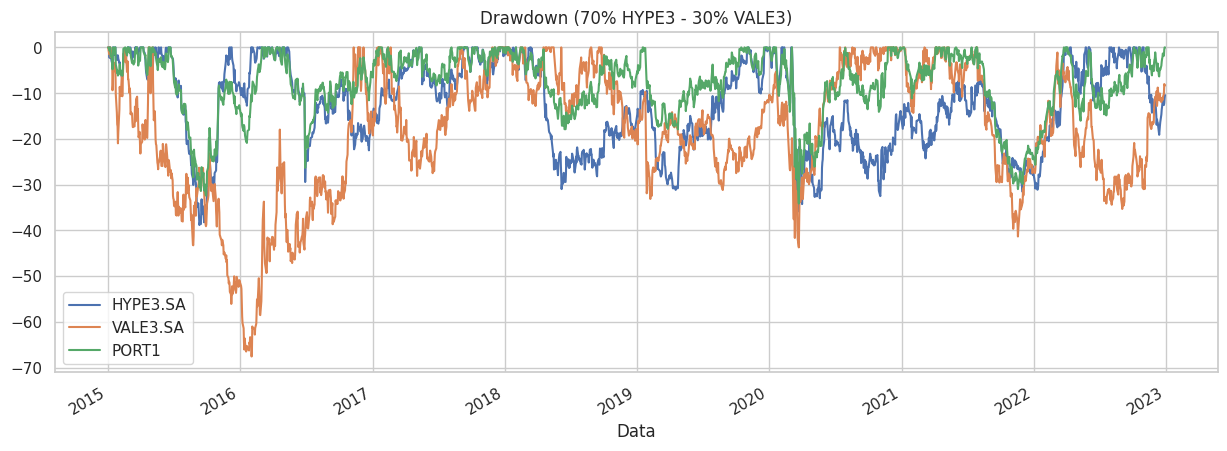

In [51]:
ddown[['HYPE3.SA', 'VALE3.SA', 'PORT1']].plot(figsize = (15, 5))
plt.title("Drawdown (70% HYPE3 - 30% VALE3)")
plt.show()

> De modo geral, o drawdown do portifólio se sai melhor do que o drawdown dos ativos indivualmente. A maior queda registrada para o portifólio é de -34.145891, enquanto os ativos HYPE3 e VALE3 caem até -38.841215 e -67.580270, respectivamente.

## Rentabilidade & Volatilidade anualizadas

In [67]:
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/8)) - 1 #período de 8 anos
print("Retorno anualizado:")
print(ret_aa)

Retorno anualizado:
ABEV3.SA    0.029156
BBDC4.SA    0.061035
BBSE3.SA    0.088606
CIEL3.SA   -0.128502
ELET3.SA    0.322497
HYPE3.SA    0.171206
ITUB4.SA    0.084688
PETR4.SA    0.249464
PRIO3.SA    0.741409
VALE3.SA    0.266848
PORT1       0.205791
dtype: float64


In [68]:
vol_aa = dados_chg.std()*np.sqrt(252)
print("Volatilidade anualizada:")
print(vol_aa)

Volatilidade anualizada:
ABEV3.SA    0.275773
BBDC4.SA    0.368165
BBSE3.SA    0.310408
CIEL3.SA    0.461131
ELET3.SA    0.563496
HYPE3.SA    0.330510
ITUB4.SA    0.329376
PETR4.SA    0.507949
PRIO3.SA    0.771966
VALE3.SA    0.470953
PORT1       0.286697
dtype: float64


Text(0.5, 1.0, 'Evolução temporal do preço (PORT1: 70% HYPE3 - 30% VALE3)')

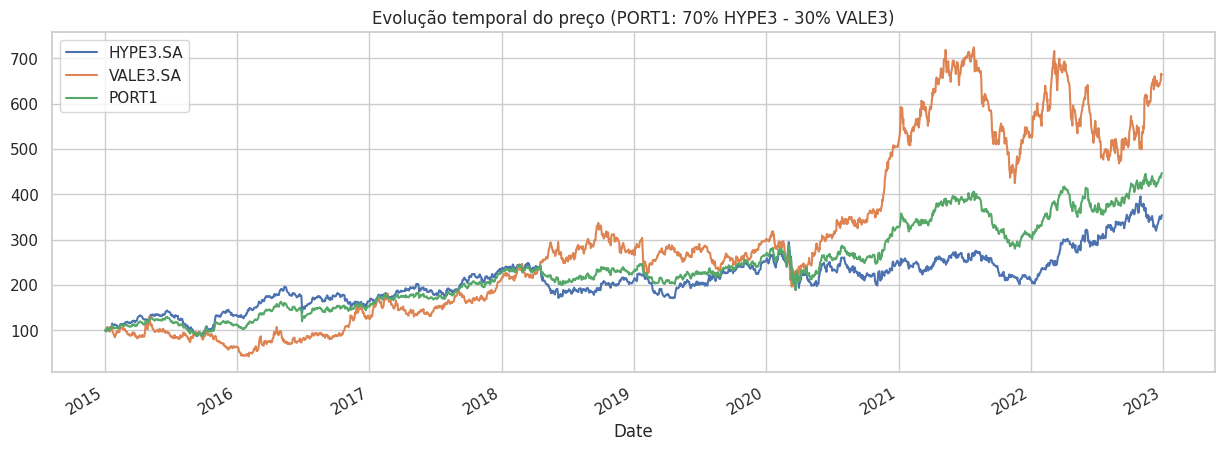

In [69]:
dados[['HYPE3.SA', 'VALE3.SA', 'PORT1']].plot(figsize = (15, 5))
plt.title("Evolução temporal do preço (PORT1: 70% HYPE3 - 30% VALE3)")

> Temos o retorno do portifólio como a média ponderada pelo peso da participação de cada ativo, enquanto a volatilidade do portifólio é menor do que o risco de cada uma das ações individualmente.

# Portifólio 2: combinação de 3 ações

Vamos adicionar mais uma ação ao portifólio já composto por HYPE3 e VALE3.

In [73]:
dados_chg.corr()

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA,PORT1
ABEV3.SA,1.000000,0.463171,0.375209,0.361367,0.310363,0.360068,0.473868,0.357412,0.215968,0.220841,0.370087
BBDC4.SA,0.463171,1.000000,0.551765,0.396267,0.480442,0.409052,0.863580,0.597598,0.283381,0.370896,0.489130
BBSE3.SA,0.375209,0.551765,1.000000,0.375799,0.397167,0.397389,0.576610,0.435888,0.196105,0.255260,0.419368
CIEL3.SA,0.361367,0.396267,0.375799,1.000000,0.295191,0.342037,0.390060,0.321121,0.207575,0.194729,0.342441
ELET3.SA,0.310363,0.480442,0.397167,0.295191,1.000000,0.320418,0.468323,0.440271,0.206680,0.250196,0.359294
HYPE3.SA,0.360068,0.409052,0.397389,0.342037,0.320418,1.000000,0.416462,0.342988,0.210488,0.179023,0.852874
ITUB4.SA,0.473868,0.863580,0.576610,0.390060,0.468323,0.416462,1.000000,0.573507,0.264221,0.345999,0.480970
PETR4.SA,0.357412,0.597598,0.435888,0.321121,0.440271,0.342988,0.573507,1.000000,0.410630,0.462318,0.477282
PRIO3.SA,0.215968,0.283381,0.196105,0.207575,0.206680,0.210488,0.264221,0.410630,1.000000,0.313783,0.313683
VALE3.SA,0.220841,0.370896,0.255260,0.194729,0.250196,0.179023,0.345999,0.462318,0.313783,1.000000,0.626485


> Olhando novamente para a tabela de correlações entre a variação diária dos ativos, buscamos idealmente uma ação que apresente baixa correlação para com ambas, HYPE3 e VALE3.

> Valores de correlação:
> * HYPE3: VALE3 < PRIO3 < ELET3 < CIEL3 < PETR4 < ABEV3 < ...
* VALE3: HYPE3 < CIEL3 < ABEV3 < ELET3 < BBSE3 < PRIO3 < ... 

A escolhida foi: PRIO3. Empresa com ações em alta, e a pessoa dona do portifólio é entusiasta do setor de petróleo e gás.

* HYPE3: farmacêutica
* VALE3: minerador
* PRIO3: petróleo e gás

## Proporção do portifólio

In [9]:
# Rentabilidade & volatilidade do portifólio
def calc_ret_vol(ativos, ativos_chg, port_pesos):
  port = ativos.dot(port_pesos)
  port_chg = port.pct_change()
  port_chg = port_chg.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/8)) - 1 #retorno anualizado (8 anos)
  vol = port_chg.std()*np.sqrt(252)               #volatilidade anualizada
  return ret, vol

In [91]:
a = dados.columns.values
print(a)
print(len(a))

['ABEV3.SA' 'BBDC4.SA' 'BBSE3.SA' 'CIEL3.SA' 'ELET3.SA' 'HYPE3.SA'
 'ITUB4.SA' 'PETR4.SA' 'PRIO3.SA' 'VALE3.SA' 'PORT1']
11


### Tentativa 1: HYPE3, VALE3, PRIO3

In [12]:
# Portifólio com 3 ativos: HYPE3, VALE3, PRIO3
points = []
min_vol_ret = [100, 0] #[vol, ret]
min_port_pesos = np.zeros(len(dados.columns.values))
port_pesos = np.zeros(len(dados.columns.values))

for w1 in range(0, 101, 5): #ativo 1
  for w2 in range(0, 101 - w1, 5): #ativo 2

    port_pesos[9] = w1/100 #VALE3
    port_pesos[5] = w2/100 #HYPE3
    port_pesos[8] = 1 - w1/100 - w2/100 #PRIO3
    ret, vol = calc_ret_vol(dados, dados_chg, port_pesos)

    print(f"Alocação: {round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round((1 - w1/100 - w2/100), 2):.2f} Retorno: {round(ret, 3):.3f} Volatilidade: {round(vol, 3):.3f}")

    points.append([ret, vol]) #salvando dados

    # Estamos interessados no portifólio de menor volatilidade
    if (vol < min_vol_ret[0]):
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      min_port_pesos[9] = w1/100 #VALE3
      min_port_pesos[5] = w2/100 #HYPE3
      min_port_pesos[8] = 1 - w1/100 - w2/100 #PRIO3

Alocação: 0.00 0.00 1.00 Retorno: 0.741 Volatilidade: 0.772
Alocação: 0.00 0.05 0.95 Retorno: 0.731 Volatilidade: 0.726
Alocação: 0.00 0.10 0.90 Retorno: 0.720 Volatilidade: 0.690
Alocação: 0.00 0.15 0.85 Retorno: 0.708 Volatilidade: 0.659
Alocação: 0.00 0.20 0.80 Retorno: 0.696 Volatilidade: 0.633
Alocação: 0.00 0.25 0.75 Retorno: 0.683 Volatilidade: 0.610
Alocação: 0.00 0.30 0.70 Retorno: 0.669 Volatilidade: 0.589
Alocação: 0.00 0.35 0.65 Retorno: 0.655 Volatilidade: 0.570
Alocação: 0.00 0.40 0.60 Retorno: 0.639 Volatilidade: 0.552
Alocação: 0.00 0.45 0.55 Retorno: 0.623 Volatilidade: 0.534
Alocação: 0.00 0.50 0.50 Retorno: 0.605 Volatilidade: 0.518
Alocação: 0.00 0.55 0.45 Retorno: 0.586 Volatilidade: 0.501
Alocação: 0.00 0.60 0.40 Retorno: 0.565 Volatilidade: 0.485
Alocação: 0.00 0.65 0.35 Retorno: 0.542 Volatilidade: 0.468
Alocação: 0.00 0.70 0.30 Retorno: 0.516 Volatilidade: 0.451
Alocação: 0.00 0.75 0.25 Retorno: 0.486 Volatilidade: 0.432
Alocação: 0.00 0.80 0.20 Retorno: 0.452 

In [15]:
# Portifólio de menor volatilidade anualizada
print(min_vol_ret)
print(min_port_pesos)

[0.2866967406776215, 0.20579074360644456]
[0.  0.  0.  0.  0.  0.7 0.  0.  0.  0.3]


> Ops: parece que ao adicionar o ativo PRIO3 não há ganho em termos de menor volatilidade (muito pelo contrário), de tal modo que o portifólio de menor volatilidade anualizada indica 0% de participação de PRIO3. 

Vamos tentar com outra ação, talvez uma de baixa volatilidade.

### Tentativa 2: HYPE3, VALE3 e ABEV3

Considerando o portifólio de 3 ativos composto por: HYPE3, VALE3 e ABEV3

In [16]:
# Portifólio com 3 ativos: HYPE3, VALE3, ABEV3
points = []
min_vol_ret = [100, 0] #[vol, ret]
min_port_pesos = np.zeros(len(dados.columns.values))
port_pesos = np.zeros(len(dados.columns.values))

for w1 in range(0, 101, 5): #ativo 1
  for w2 in range(0, 101 - w1, 5): #ativo 2

    port_pesos[9] = w1/100 #VALE3
    port_pesos[5] = w2/100 #HYPE3
    port_pesos[0] = 1 - w1/100 - w2/100 #ABEV3
    ret, vol = calc_ret_vol(dados, dados_chg, port_pesos)

    print(f"Alocação: {round(w1/100, 2):.2f} {round(w2/100, 2):.2f} {round((1 - w1/100 - w2/100), 2):.2f} Retorno: {round(ret, 3):.3f} Volatilidade: {round(vol, 3):.3f}")

    points.append([ret, vol]) #salvando dados

    # Estamos interessados no portifólio de menor volatilidade
    if (vol < min_vol_ret[0]):
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      min_port_pesos[9] = w1/100 #VALE3
      min_port_pesos[5] = w2/100 #HYPE3
      min_port_pesos[0] = 1 - w1/100 - w2/100 #ABEV3

Alocação: 0.00 0.00 1.00 Retorno: 0.029 Volatilidade: 0.276
Alocação: 0.00 0.05 0.95 Retorno: 0.040 Volatilidade: 0.264
Alocação: 0.00 0.10 0.90 Retorno: 0.051 Volatilidade: 0.255
Alocação: 0.00 0.15 0.85 Retorno: 0.061 Volatilidade: 0.249
Alocação: 0.00 0.20 0.80 Retorno: 0.070 Volatilidade: 0.246
Alocação: 0.00 0.25 0.75 Retorno: 0.078 Volatilidade: 0.245
Alocação: 0.00 0.30 0.70 Retorno: 0.087 Volatilidade: 0.246
Alocação: 0.00 0.35 0.65 Retorno: 0.094 Volatilidade: 0.248
Alocação: 0.00 0.40 0.60 Retorno: 0.102 Volatilidade: 0.251
Alocação: 0.00 0.45 0.55 Retorno: 0.109 Volatilidade: 0.255
Alocação: 0.00 0.50 0.50 Retorno: 0.116 Volatilidade: 0.260
Alocação: 0.00 0.55 0.45 Retorno: 0.122 Volatilidade: 0.266
Alocação: 0.00 0.60 0.40 Retorno: 0.128 Volatilidade: 0.272
Alocação: 0.00 0.65 0.35 Retorno: 0.134 Volatilidade: 0.279
Alocação: 0.00 0.70 0.30 Retorno: 0.140 Volatilidade: 0.285
Alocação: 0.00 0.75 0.25 Retorno: 0.146 Volatilidade: 0.293
Alocação: 0.00 0.80 0.20 Retorno: 0.151 

In [17]:
# Portifólio de menor volatilidade anualizada
print(min_vol_ret)
print(min_port_pesos)

[0.2293402520030157, 0.10683399730966459]
[0.7 0.  0.  0.  0.  0.2 0.  0.  0.  0.1]


> Agora sim, temos uma mudança na composição do portifólio. Nossa análise de risco indica que a introcução do ativo ABEV3 reduz a volatilidade para 22%, com retorno de 10% ao ano. A proporção para a volatilidade mínima seria 70% ABEV3 - 20% HYPE3 - 10% VALE3.

> Comparando com o portifólio anterior, temos uma redução da volatilidade de 0.286697 para 0.22934025. Por outro lado, o retorno esperado cai quase pela metade de 0.205791 para 0.1068339. 

In [18]:
# Criando portifólio de menor volatilidade
dados['PORT2'] = dados.dot(min_port_pesos)
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

In [19]:
display(dados)

,ABEV3.SA,BBDC4.SA,BBSE3.SA,CIEL3.SA,ELET3.SA,HYPE3.SA,ITUB4.SA,PETR4.SA,PRIO3.SA,VALE3.SA,PORT2
Date,,,,,,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,98.189745,100.206216,97.001638,96.601216,98.056530,100.185280,100.502519,91.452988,92.500002,98.496233,98.619501
2015-01-06,101.935069,103.502704,101.120237,94.662617,98.939910,97.899933,102.128286,88.461509,83.409094,102.443578,101.178892
2015-01-07,103.370776,107.615983,99.505764,95.543784,102.473483,103.767738,105.823241,92.628203,83.181818,106.202985,103.733390
2015-01-08,109.599529,108.170207,99.209215,98.187273,100.530024,103.520683,107.478569,98.611104,85.909089,107.330815,108.156888
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.715891,160.528220,196.524947,32.331548,959.515124,351.152207,193.075597,609.035473,8065.909516,644.321122,223.363677
2022-12-26,125.849166,156.711169,194.535709,32.577331,952.183841,345.434124,189.243205,604.671358,8054.545186,650.217901,222.203031
2022-12-27,125.849166,155.968966,194.243172,32.259812,927.079577,347.079071,188.170136,608.793017,8086.364096,665.743757,224.084606


## Rentabilidade & Volatilidade anualizadas

In [27]:
# Retorno
ret_aa = ((dados.iloc[-1]/dados.iloc[0])**(1/8)) - 1 #período de 8 anos
print("Retorno anualizado:")
print("ABEV3.SA", ret_aa['ABEV3.SA'])
print("HYPE3.SA", ret_aa['HYPE3.SA'])
print("VALE3.SA", ret_aa['VALE3.SA'])
print("PORT2", ret_aa['PORT2'])

Retorno anualizado:
ABEV3.SA 0.029156195482736624
HYPE3.SA 0.17120558442691802
VALE3.SA 0.2668475886689319
PORT2 0.10683399730966459


In [29]:
# Volatilidade
vol_aa = dados_chg.std()*np.sqrt(252)
print("Volatilidade anualizada:")
print("ABEV3.SA", vol_aa['ABEV3.SA'])
print("HYPE3.SA", vol_aa['HYPE3.SA'])
print("VALE3.SA", vol_aa['VALE3.SA'])
print("PORT2", vol_aa['PORT2'])

Volatilidade anualizada:
ABEV3.SA 0.27577295008157793
HYPE3.SA 0.33051013340647084
VALE3.SA 0.4709532519467835
PORT2 0.2293402520030157


Text(0.5, 1.0, 'Evolução temporal do preço (PORT2: 70% ABEV3 - 20% HYPE3 - 10% VALE3)')

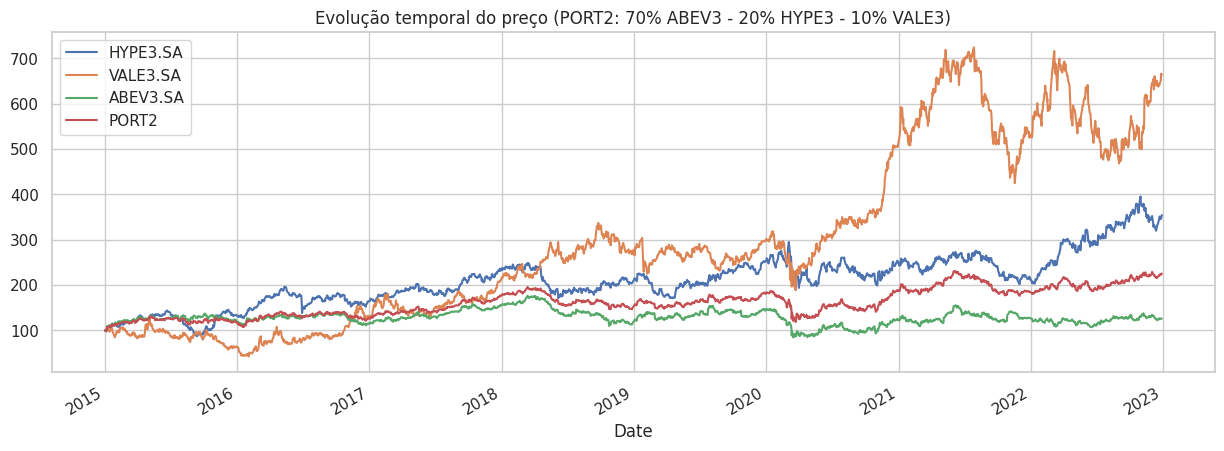

In [25]:
dados[['HYPE3.SA', 'VALE3.SA', 'ABEV3.SA', 'PORT2']].plot(figsize = (15, 5))
plt.title("Evolução temporal do preço (PORT2: 70% ABEV3 - 20% HYPE3 - 10% VALE3)")

> Temos uma carteira composta por 3 ativos de setores distintos (farmacêutico, mineração e bebidas) cuja volatilidade é menor do que as volatilidades das ações individualmente (seu comportamento passa sempre pelo meio dos outros). O retorno anualizado é obtido pela média ponderada dos retornos individuais, e devido a ação ABEV3 compor a maior fração da carteira, isso faz com que o retorno do portifólio 2 diminua bastante em comparação com o portifólio 1. 

## Gráfico: Fronteira eficiente de Markowitz

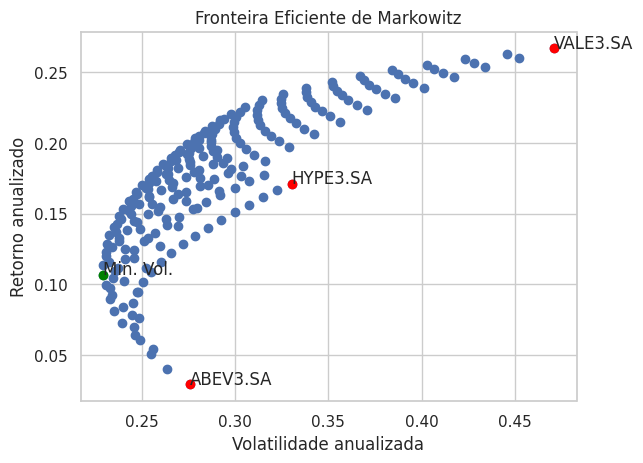

In [24]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno anualizado");
plt.xlabel("Volatilidade anualizada");
plt.title("Fronteira Eficiente de Markowitz")

plt.scatter(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], color='red');
plt.text(vol_aa['VALE3.SA'], ret_aa['VALE3.SA'], 'VALE3.SA');

plt.scatter(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], color='red');
plt.text(vol_aa['HYPE3.SA'], ret_aa['HYPE3.SA'], 'HYPE3.SA');

plt.scatter(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], color='red');
plt.text(vol_aa['ABEV3.SA'], ret_aa['ABEV3.SA'], 'ABEV3.SA');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

> A fronteira eficiente de Markowitz nos mostra a relação retorno-risco para a composição do portifólio com essas trÊs ações. É possível escolher outra proporção para a carteira em prol de aumentar o retorno esperado, porém ao fazê-lo estaríamos aumentando também o risco/volatilidade.

> Por termos 3 ativos em jogo, agora temos uma área representando as possíveis sáidas de retorno-risco ao invés da curva obtida para somente 2 ativos.

## Gráfico: Drawdown

In [30]:
# Drawdown do portifólio 2 
ddown = pd.DataFrame()

for ativo in dados.columns:
  list = []
  for ind in range(dados.count()[0]): #calcula todas as diferenças
    list.append((dados[ativo].iloc[ind]/dados[ativo].iloc[:ind+1].max()-1) * 100)
  ddown[ativo] = list

ddown['Data'] = dados.index.values #vetor com histórico de drawdown
ddown.set_index(keys = 'Data', inplace = True)

print(ddown.min())

ABEV3.SA   -51.989778
BBDC4.SA   -52.742812
BBSE3.SA   -44.043646
CIEL3.SA   -91.679328
ELET3.SA   -67.444394
HYPE3.SA   -38.841203
ITUB4.SA   -45.213997
PETR4.SA   -70.893975
PRIO3.SA   -78.790985
VALE3.SA   -67.580273
PORT2      -39.357443
dtype: float64


> Temos a queda máxima para o portifólio 2 bem baixa, porém não necessariamente menor do que a das ações individuais: HYPE3 apresenta mínimo de drawdown de -38, enquanto o portifólio -39.

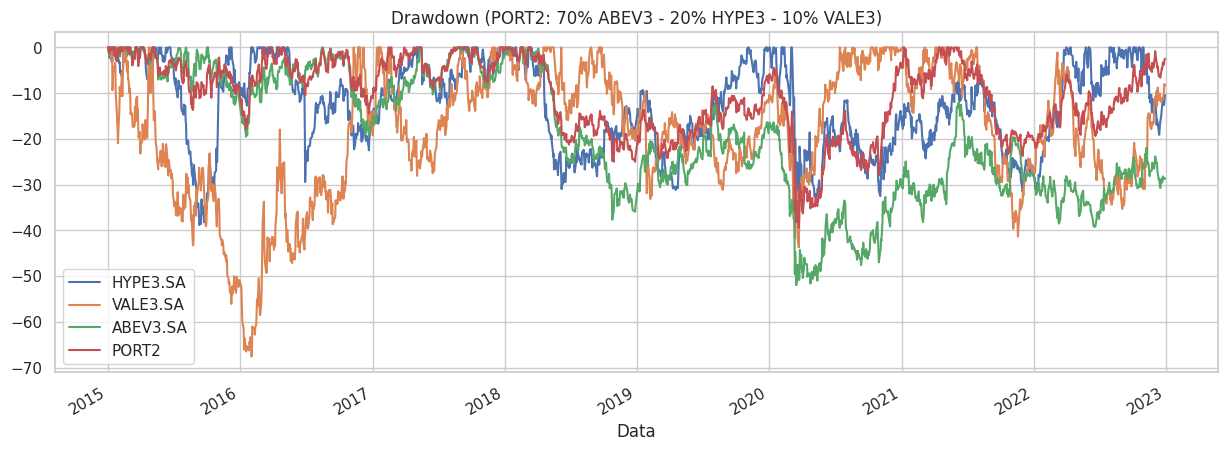

In [31]:
ddown[['HYPE3.SA', 'VALE3.SA', 'ABEV3.SA', 'PORT2']].plot(figsize = (15, 5))
plt.title("Drawdown (PORT2: 70% ABEV3 - 20% HYPE3 - 10% VALE3)")
plt.show()

> No geral, vemos que o drawdown do portifólio se sai muito bem quando comparado às ações individuais.

# Conclusão

No trabalho foi possível por em práticas as maneiras de se obter dados financeiros e de como se tirar informações quantitativas deles vistas em sala de aula. Conceitos de retorno e volatilidade foram explorados, além do método da fronteira eficiente de Markowitz, que propõe uma maneira visual de se compor um portifólio de forma otimizada considerando o menor risco esperado. Durante o trabalho, percebeu-se que a escolha dos ativos para se compor um portifólio não é algo tão simples, tendo que se considerar diferentes fatores na escolha, como seu retorno, volatilidade e correlação com os outros ativos da carteira. Nem sempre quanto mais ativos melhor, como vimos ao tentar introduzir a ação PRIO3 em um portifólio com HYPE3 e VALE3. É bom sermos capazes de explorar métodos quantitativos que ajudem na tomada de melhores decisões ao se pensar em portifólios financeiros. 

